In [ ]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Probability

##  Some definitions

* **Experiment** - a repeatable procedure with a set of well-defined possible results (e.g. rolling a die).
* **Trial** - a single performance of an experiment (e.g. one roll of the die).
* **Outcome** - the result of a trial (e.g. a 2 was rolled).
* **Sample Space** - all the possible outcomes of an experiment (e.g. 1, 2, 3, 4, 5, or 6).
* **Event** - one or more outcomes of interest in the sample space (e.g. two 3s were rolled in a row, an odd number was rolled, etc.).

#### Most important to me that we grasp these two:
* **Population** - the entire group that you want to draw conclusions about
* **Sample** - the specific group that you will collect data from


Sample vs population examples:

* You're wanting to measuring the pH of the Gulf of Mexico.  You can't directly measure the whole body of water (the whole body of water is the population); you'll need to take many measurements and different locations (these measurements are the sample(s)).
* Political polling only polls a small group (sample) and attempts to generalize the results to the entire country (population).


Check for understanding:

* I'm performing a study using animals at my local shelter to see if dogs or cats have better breath
    * What is the population?
    * What is the sample?
* My company wants see if users would respond to a promotional email by buying more product.
    * What is the population?
    * How might you create a sample from this population?
    
---

population & sample definitions from [here](https://www.scribbr.com/methodology/population-vs-sample/#:~:text=A%20population%20is%20the%20entire,t%20always%20refer%20to%20people.).

## Playing with probability

In [165]:
# simulating random events
import random as rand

# viewing and manipulating tables of data
import pandas as pd

import numpy as np

# plotting
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

### Coin flip

* Write a function to simulate a coin flip
* Use the function to flip a coin 500 times
* According to this data, what is the probability of heads?

----

* Bonus prompt: create a plot of the probability of heads over time in this simulation (i.e. lets say my trials resulted in `['H', 'T', 'T']`, at time `0` the probability of heads is 1.0, at time `1` probability is `0.5`, at time `2` probability is `0.33333`).

In [8]:
def coin_flip():
    sample_space = ["H", "T"]
    h_count = 0
    t_count = 0
    for _ in range(500):
        outcome = rand.choice(sample_space)
        if outcome == "H":
            h_count += 1
        else:
            t_count += 1
    prob_h = h_count / 500 * 100
    return prob_h

In [9]:
heads_list = []
for _ in range(100):
    h_trial = coin_flip()
    heads_list.append(h_trial)
# heads_list
h_df = pd.DataFrame(heads_list)

In [10]:
h_df.head()

,0
0,49.6
1,52.2
2,46.0
3,51.6
4,50.4


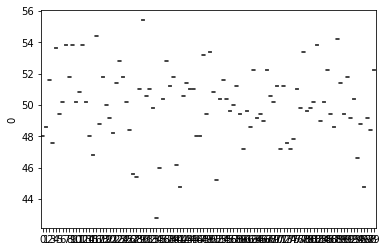

<IPython.core.display.Javascript object>

In [ ]:
sb.

## Iris

If we selected a row at random from this data...

* What's the probability the `'species'` is virginica?
* What's the probability the `'petal_length'` is greater than `2.0`?

Options to solve:
* Describe what's in the dataframe directly.
* Simulate by random sampling.

In [97]:
iris = sb.load_dataset("iris")


In [96]:
n_sample = iris.size

In [98]:
virginica = iris['species'] == 'virginica'
virginica = iris.iloc[virginica.values]

In [ ]:
n_virginica = virginica.size
p_virginica = n_virginica/n_sample

In [101]:
#   prob species is virginica
p_virginica

0.3333333333333333

In [105]:
length_over_two = iris.iloc[(iris['petal_length'] > 2).values]

#   pnum of petal length over 2
n_length_over_two = (length_over_two.size)

#   prob of petal length over 2
p_length_over_two = n_length_over_two/n_sample
p_length_over_two

0.6666666666666666

### Monty hall

You're on a gameshow where you're given 3 doors to choose from, each with a different prize.  Behind 1 door is your dream car; behind the other 2, goats.  

The game show host, Monty, has you choose a door.  After you choose, Monty opens one of the remaining 2 doors to show a goat behind it.  This leaves the door you chose, and the one other remaining door; Monty gives you the chance to change your decision to the other door.

Should you change or keep your door? Does it make a difference?

Write a simulation to compare the 2 strategies:

##### What's the probability of winning if you keep your original door?
* Process needed to simulate a round:
    1. Create a length 3 list of the possible outcomes; you can `shuffle` the list if you'd like it to feel more random (to represent the doors)
    2. Randomly choose an item from the list (to represent the player's initial choice)
    3. Check if the chosen item is the winning item or a goat
    
Make sure your code to simulate a round is working before you move on to simulating many rounds.

In [129]:
#   create list of options
outcomes = ['goat', 'goat', 'car']

In [167]:
trials = 1000
car_probs = []

for _ in range(trials):    
    cars = 0
    goats = 0
    rounds = 500
    for _ in range(rounds):
        #   shuffle list contents
        rand.shuffle(outcomes)
        #   randomly choose item from list
        choice = rand.choice(outcomes)
        #   check result and add to choice counter
        if choice == 'car':
            cars += 1
        else:
            goats += 1

    #   calc the prob of choosing the car
    p_car = cars/rounds
    car_probs.append(p_car)

m_trials = np.mean(car_probs)


0.33275


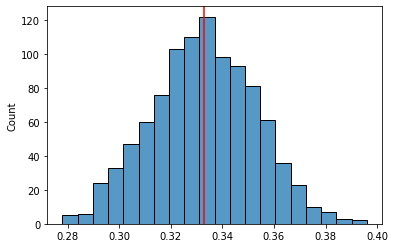

In [170]:
#   print mean of choosing a car
print(m_trials)

#   plot car_probs
sb.histplot(car_probs)
plt.axvline(m_trials, c='r')
plt.show()

##### What's the probability of winning if you change your door?
* Process needed to simulate a round:
    1. Create a length 3 list of the possible outcomes; you can `shuffle` the list if you'd like it to feel more random (to represent the doors)
    2. Randomly choose an item from the list (to represent the player's initial choice)
    3. Switch the players item to the opposite of what they currently have.  Explanation for that poorly worded sentence: There are 2 cases at this point for the switch strategy (make sure to prove that you agree with these 2 cases):
        * If the player currently has a car, a switch means they'll have a goat as their final choice
        * If the player currently has a goat, a switch means they'll have a car as their final choice
    4. Check if the switched item is the winning item or a goat
    
Make sure your code to simulate a round is working before you move on to simulating many rounds.

In [178]:
#   create list of options
outcomes = ['goat', 'goat', 'car']

In [ ]:
#   number of trials to run
trials = 10000
#   number of rounds per trial
rounds = 5000
#   list for the probs of car each trial
car_probs = []

for _ in range(trials):    
    cars = 0
    goats = 0
    for _ in range(rounds):
        #   shuffle the list of outcomes
        rand.shuffle(outcomes)
        #   randomly select one of the choices
        choice = rand.choice(outcomes)
        # switch opriginal choice to other possible choice
        if choice == 'car':
            choice = 'goat'
            goats += 1
        else:
            choice = 'car'
            cars += 1
    p_car = cars/rounds
    car_probs.append(p_car)

m_trials = np.mean(car_probs)



10000 trials 
50000000 rounds 
5000 rounds/trial 
mean: 0.66670.


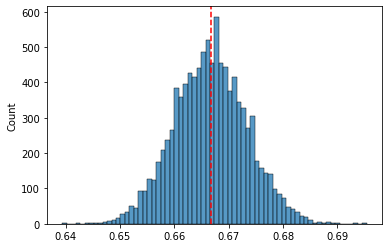

In [186]:
t_rounds = trials*rounds
print('{} trials \n{} rounds \n{} rounds/trial \nmean: {:.5f}.'.format(trials, t_rounds, rounds, m_trials))
sb.histplot(car_probs)
plt.axvline(m_trials, c='r', linestyle='--')
plt.show()

Process to simulate many rounds and calculate probability of winning: left as an exercise to the reader.